In [1]:
import numpy as np
import sympy as sy
import matplotlib.cm as cm
from scipy.optimize import fsolve
import matplotlib.pylab as plt
from PIL import Image
import warnings
import time
import os

warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 30
from IPython.display import display, Math

Consider the **sine map** $x_{t+1} = f(x_t)$ where $f(x) = r\sin(\pi x)$.                                                                       
The interesting behavior of this map is for $0 < x < 1$ and $0 < r < 1,$ so restrict your attention to these ranges.                                                                                 
(a) Using a plot analogous to Figure 12.35, discuss the fixed points of this map.                                                  
Show that the map has either one or two fixed points, depending on the value of $r$. Show that when $r$ is small there is just one fixed point, which is stable.                                                                                                        
(b) At what value of $r$ (call it ro) does the second fixed point appear? Show that $r_o$ is also the value of $r$ at which the first fixed point becomes unstable.                                                                                                  
(c) As $r$ increases, the second fixed point eventually becomes unstable. Find numerically the value $r_1$ at which this occurs.

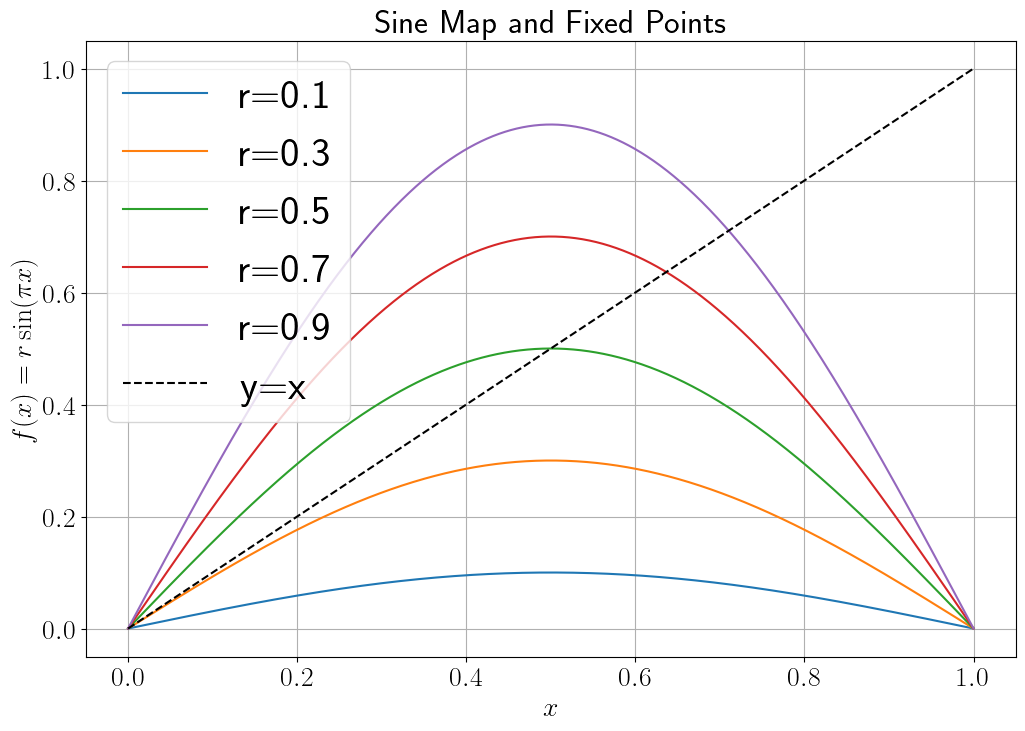

In [2]:
def sine_map(x, r):
    return r * np.sin(np.pi * x)

# Values of r to explore
r_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Generate x values
x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 8))

for r in r_values:
    plt.plot(x, sine_map(x, r), label=f'r={r}')

plt.plot(x, x, 'k--', label='y=x')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x) = r \sin(\pi x)$')
plt.title('Sine Map and Fixed Points')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def find_fixed_points(r):
    # Function to solve x = r * sin(pi * x)
    def equation(x):
        return x - r * np.sin(np.pi * x)

    # Find roots starting from different initial guesses
    roots = []
    for guess in np.linspace(0, 1, 100):
        root, info, ier, _ = fsolve(equation, guess, full_output=True)
        if ier == 1 and 0 <= root[0] <= 1:
            roots.append(root[0])

    return np.unique(roots)

def stability(r, x):
    # Calculate the derivative at x
    return r * np.pi * np.cos(np.pi * x)

# Example to find r_o
r_o = None
for r in np.linspace(0.1, 1, 1000):
    fixed_points = find_fixed_points(r)
    if len(fixed_points) == 2:
        r_o = r
        break

if r_o is not None:
    print(f"Estimated value of r_o: {r_o:.5f}")
else:
    print("No value for r_o found.")

# Example to find r_1
r_1 = None
for r in np.linspace(r_o, 1, 1000):
    fixed_points = find_fixed_points(r)
    if len(fixed_points) == 2 and stability(r, fixed_points[1]) <= -1:
        r_1 = r
        break

if r_1 is not None:
    print(f"Estimated value of r_1: {r_1:.5f}")
else:
    print("No value for r_1 found.")

Estimated value of r_o: 0.21261
No value for r_1 found.


Consider the sine map of Problem 12.23. Find the first ten or twenty values of $x_t$ for any chosen inital value $x_o$ .                                                                                   
Taking $x_o = 0.3,$ calculate the first $10$ values of $x_t$ for each of the following values of the parameter $r$:                                                                                        
$\qquad (a)\ r = 0.1, (b)\ r = 0.5, (c)\ r = 0.78 $.                                                                                                             
In each case plot your results ($x_t$ against $t$) and describe the long-term attractor.                                                
If you did Problem 12.23, are your results here consistent with what you proved there?

In [4]:
def compute_values( f, x0, r, n_iter):
    
    R = [x0]
    x = x0
    for i in range(n_iter - 1 ):
        x = f(x, r)
        R.append(x)
    return np.array(R)

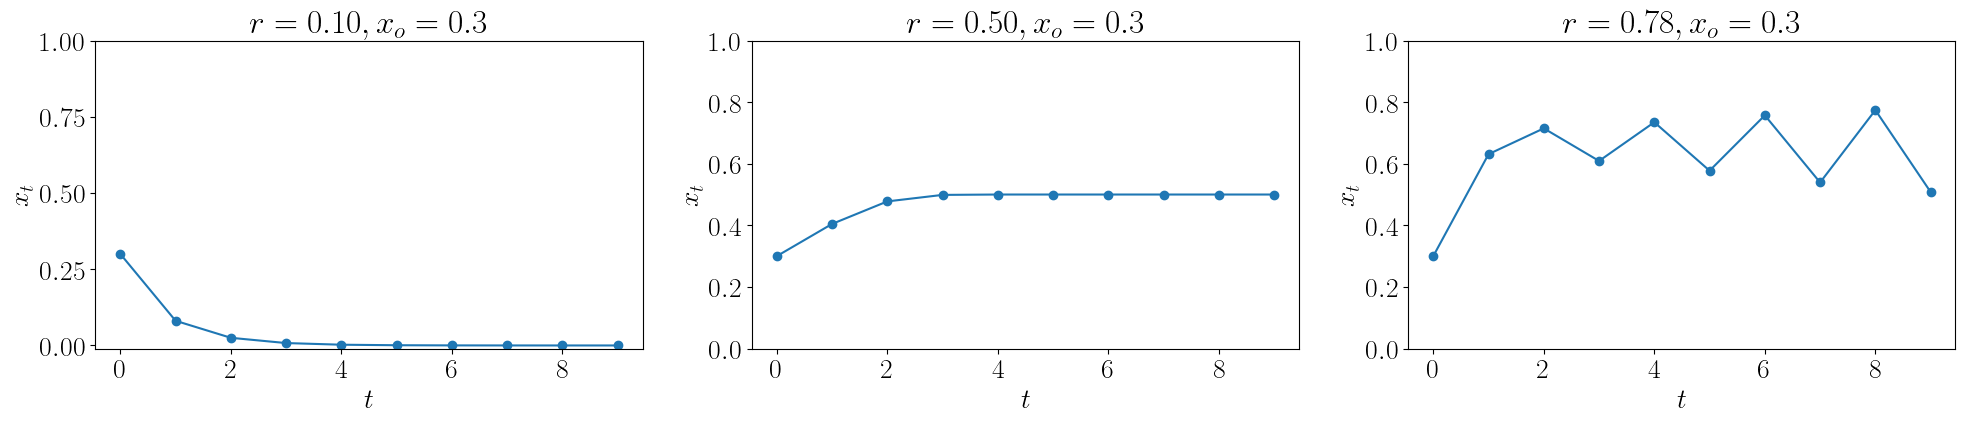

In [5]:
def sine_map(x, r):
    return r * np.sin(np.pi * x)

r_a = compute_values( sine_map, x0=0.3, r=0.10, n_iter=10)
r_b = compute_values( sine_map, x0=0.3, r=0.50, n_iter=10)
r_c = compute_values( sine_map, x0=0.3, r=0.78, n_iter=10)

fig, ax = plt.subplots(1, 3, figsize=(24,4))

ax[0].plot(range(10), r_a, 'o-')
ax[0].set_ylim([-0.01, 1])
ax[0].set_title(r'$r=0.10,x_o=0.3$')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x_t$')
ax[1].plot(range(10), r_b, 'o-')
ax[1].set_ylim([0, 1])
ax[1].set_title(r'$r=0.50,x_o=0.3$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x_t$')
ax[2].plot(range(10), r_c, 'o-')
ax[2].set_ylim([0, 1])
ax[2].set_title(r'$r=0.78,x_o=0.3$')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_t$')
plt.show()

The sine map of Problem 12.23 exhibits period-doubling cascades just like the logistic map.                                              
To illustrate this, take $x_o = 0.8$ and find the first twenty values $x_t$ for each of the following values of the parameter $r$ :                                                                                                                              
$ \qquad (a)\ r = 0.60, (b)\ r = 0.79, (c)\ r = 0.85,\ and \ (d)\ r = 0.865 $                                                                              
Plot your results (as four separate plots) and comment.

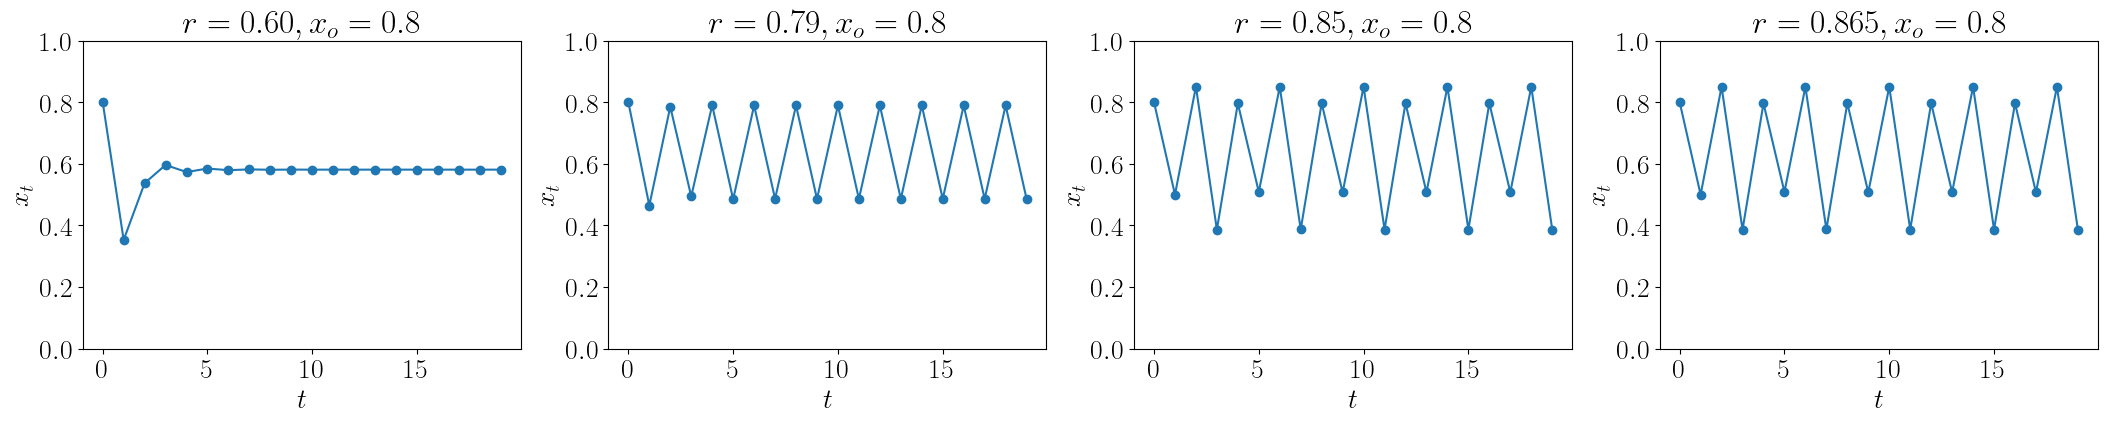

In [6]:
r_a = compute_values( sine_map, x0=0.8, r=0.60 , n_iter=20)
r_b = compute_values( sine_map, x0=0.8, r=0.79 , n_iter=20)
r_c = compute_values( sine_map, x0=0.8, r=0.85 , n_iter=20)
r_d = compute_values( sine_map, x0=0.8, r=0.865, n_iter=20)

fig, ax = plt.subplots(1, 4, figsize=(26,4))

ax[0].plot(range(20), r_a, 'o-')
ax[0].set_ylim([0, 1])
ax[0].set_title(r'$r=0.60,x_o=0.8$')
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x_t$')
ax[1].plot(range(20), r_b, 'o-')
ax[1].set_ylim([0, 1])
ax[1].set_title(r'$r=0.79,x_o=0.8$')
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$x_t$')
ax[2].plot(range(20), r_c, 'o-')
ax[2].set_ylim([0, 1])
ax[2].set_title(r'$r=0.85,x_o=0.8$')
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$x_t$')
ax[3].plot(range(20), r_c, 'o-')
ax[3].set_ylim([0, 1])
ax[3].set_title(r'$r=0.865,x_o=0.8$')
ax[3].set_xlabel('$t$')
ax[3].set_ylabel('$x_t$')
plt.show()

12.29                                                                                                                                              
The thresholds $r_n$ for period doubling of the logistic map are given by Equation (12.58).                                               
These should satisfy the Feigenbaum relation (12.17), at least in the limit that $n\rightarrow\infty$ (with $\gamma$ replaced by $r$, of course).                                                                                                                       
Test this claim as follows:                                                                                                             
(a) If you have not done Problem 12.11 prove that the Feigenbaum relation (if exactly true) implies that $(r_{n+1}- r_n ) = K / \delta^n .$                                                                                                                                                     
(b) Make a plot of $\ln(r_{n+1}-r_n)$ against $n$. Find the best-fit straight line to the data and from its slope predict the Feigenbaum constant.                                                                                                                      
How does your answer compare with the accepted value $\delta = 4.67?$                                                                                      
|Position|$r_1$|$r_2$|$r_3$|$r_4$|$r_5$|$r_6$|$r_7$|
|---|---|---|---|---|---|---|---|
|Data|3.0|3.4495|3.5441|3.5644|3.5688|3.5697|3.5699|

In [7]:
def fit(x,y):
    
    sx, sy, sx2, sxy = sum(x), sum(y), sum(x*x), sum(x*y)
    n = len(x)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

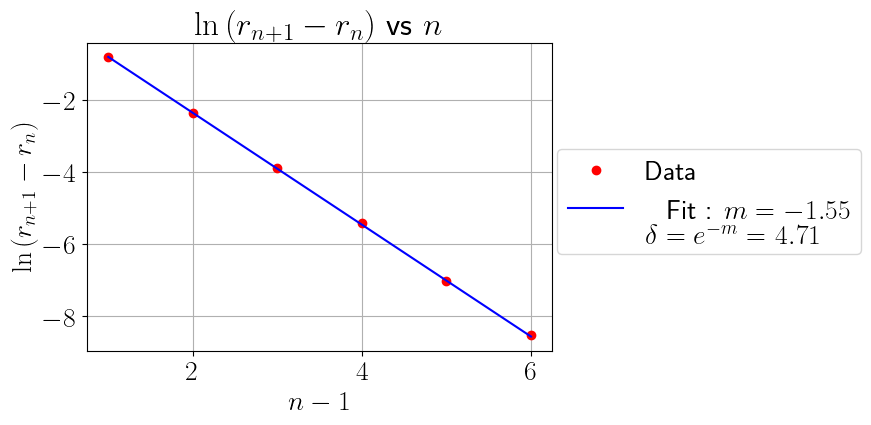

In [8]:
r_n      = np.array([3.0, 3.4495, 3.5441, 3.5644, 3.5688, 3.5697, 3.5699])
n_values = np.array([1, 2, 3, 4, 5, 6, 7])
n        = len(n_values)
r_dlog   = np.log(np.diff(r_n))
m, c     = np.round(fit(n_values[:n-1], r_dlog),2)
Y        = m*np.array(n_values[:n-1]) + c
delta    = np.exp(-m)

plt.figure(figsize=(6, 4))
plt.plot(n_values[:n-1], r_dlog, 'ro', label='Data')
plt.plot(n_values[:n-1], Y, 'b-', label=f'Fit : $m = {m:.2f}$'+r' $\\ \delta=e^{-m}=$ '+f'${delta:.2f}$')
plt.xlabel('$n-1$')
plt.ylabel(r'$\ln\left(r_{n+1} - r_n\right)$')
plt.title(r'$\ln\left(r_{n+1} - r_n\right)$ vs $n$')
plt.grid(True)
plt.legend( bbox_to_anchor=(0.98, 0.7), fontsize=20)
plt.show()

12.30                                                                                                                                      
The chaotic evolution of the logistic map shows the same sensitivity to initial conditions that we met in the DDP.                  
To illustrate this do the following:                                                                                       
(a) Using a growth rate $r = 2.6,$ calculate $x_t$ for $1 < t < 40$ starting from $x_o = 0.4$. Repeat but with the inital condition $x_o' = 0.5$                                                                                                                 
(the prime is just to distinguish this second solution from the first — it does not denote differentiation)                         
and then plot $ \log | x_t' - x_t |$ against $t$. Describe the behavior of the difference $x_t' - x_t$ .                               
(b) Repeat part (a) but with $r = 3.3$. In this case, the long term evolution has period $2$. Again describe the behavior of the difference $x_t' - x_t$ .                                                                                                     
(c) Repeat parts (a) and (b), but with $r = 3.6$. In this case, the evolution is chaotic, and we expect the difference to grow exponentially;                                                                                                                                    
therefore, it is more interesting to take the two inital values much closer together. To be definite take $x_o = 0.4$ and $x_o = 0.400001$.                                                                                                                          
How does the difference behave?

In [9]:
def plot_difference( f, r, x0, x0_prime, t_max):
    x, x_prime = x0, x0_prime
    differences, t_range = [], []
    for t in range(1, t_max + 1):
        x = f(x, r)
        x_prime = f(x_prime, r)
        diff = abs(x_prime - x)
        differences.append(np.log(diff))
        t_range.append(t)
        
    return np.array(t_range), np.array(differences)

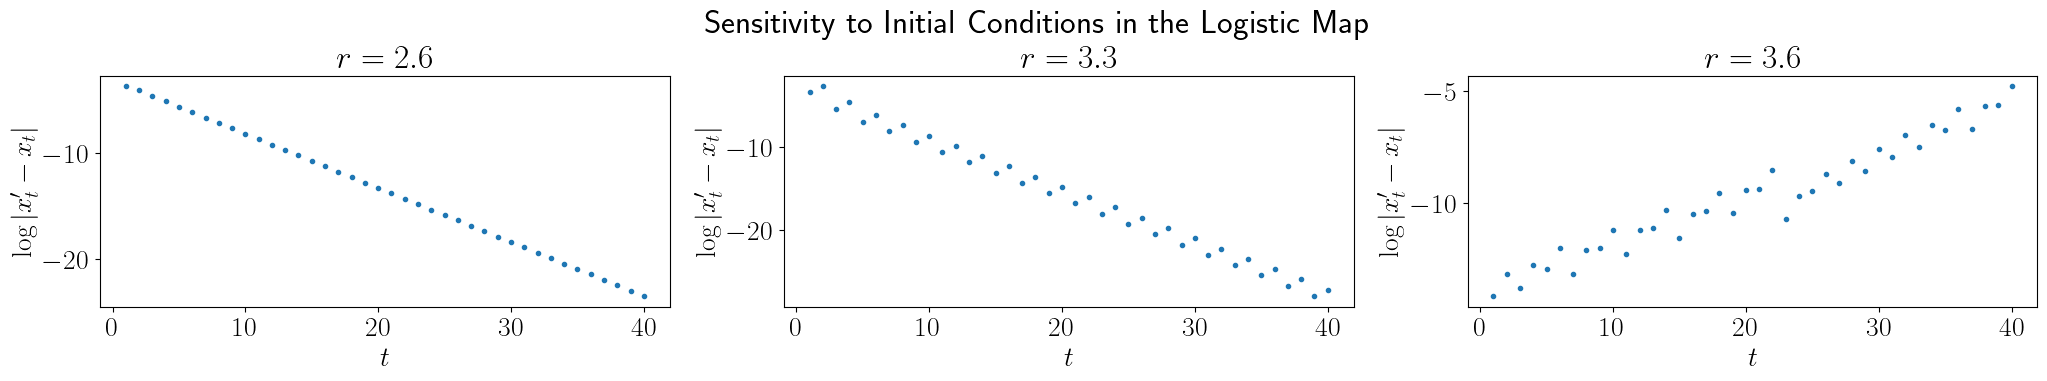

In [10]:
def logistic_map(x, r):
    return r * x * (1 - x)

t_a, r_a = plot_difference( logistic_map, r=2.6, x0=0.4, x0_prime=0.5, t_max=40)# (a) r = 2.6
t_b, r_b = plot_difference( logistic_map, r=3.3, x0=0.4, x0_prime=0.5, t_max=40)# (b) r = 3.3
t_c, r_c = plot_difference( logistic_map, r=3.6, x0=0.4, x0_prime=0.400001, t_max=40)# (c) r = 3.6

fig, ax = plt.subplots(1,3,figsize=(25,3))
plt.suptitle('Sensitivity to Initial Conditions in the Logistic Map',y=1.1)

ax[0].plot(t_a, r_a,'.')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r"$\log |x_t' - x_t|$")
ax[0].set_title(r'$r=2.6$')

ax[1].plot(t_b, r_b,'.')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r"$\log |x_t' - x_t|$")
ax[1].set_title(r'$r=3.3$')

ax[2].plot(t_c, r_c,'.')
ax[2].set_xlabel(r'$t$')
ax[2].set_ylabel(r"$\log |x_t' - x_t|$")
ax[2].set_title(r'$r=3.6$')
plt.show()

12.31                                                                                                                                              
When the evolution of the logistic map is non-chaotic, two solutions with the same $r$ that start out sufficiently close, will converge exponentially.                                                                                                          
(This was illustrated in Problem 12.30.) This does not mean that any two solutions with the same $r$ will converge.              
(a) Repeat Problem 12.30(a), with all the same parameters except r = 3.5 (a value for which we know the long-term motion has period 4).                                                                                                                               
Does $ | x_t' - x_t |$ approach zero $?$                                                                            
(b) Now do the same exercise but with the initial conditions $x_0 = 0.45$ and $x_o = 0.5$. Comment.                                       
Can you explain why, if the period is greater than 1, it is impossible that the difference $ | x_t' - x_t |$ go to zero for all choices of initial conditions?

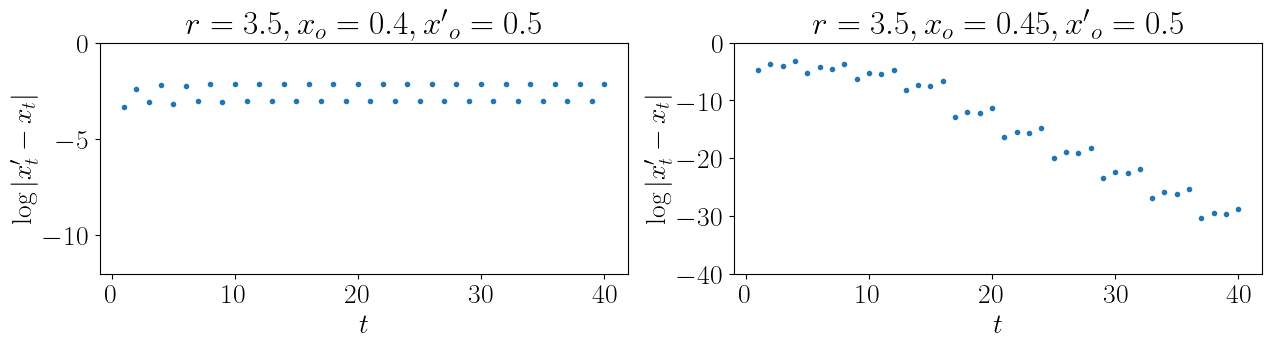

In [11]:
t_a, r_a = plot_difference( logistic_map, r=3.5, x0=0.4, x0_prime=0.5, t_max=40)# (a) r = 3.5, x0 = 0.4, x0' = 0.5
t_b, r_b = plot_difference( logistic_map, r=3.5, x0=0.45, x0_prime=0.5, t_max=40)# (b) r = 3.5, x0 = 0.45, x0' = 0.5

fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].plot(t_a, r_a,'.')
ax[0].set_xlabel(r'$t$')
ax[0].set_ylabel(r"$\log |x_t' - x_t|$")
ax[0].set_title(r"$ r=3.5,x_o=0.4, {x'}_o=0.5 $")
ax[0].set_ylim([-12, 0])

ax[1].plot(t_b, r_b,'.')
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r"$\log |x_t' - x_t|$")
ax[1].set_title(r"$r=3.5,x_o=0.45, {x'}_o=0.5 $")
ax[1].set_ylim([-40, 0])
plt.show()

12.32                                                                                                                                              
Make a bifurcation diagram for the logistic map, in the style of Figure 12.41 but for the range $0 < r < 3.55$. Take $x_0 = 0.1.$ Comment on its main features.                                                                                                              
[Hint: Start by using a very small number of points, perhaps just $r$ going from $0$ to $3.5$ in steps of $0.5$ and $t$ going from $51$ to $54$.                                                                                                                       
This will let you calculate for each of the values of $r$ individually, and get the feel of how things work.                                
To make a good diagram, you will then need to increase the number of points ($r$ going from $0$ to $3.55$ in steps of $0.025,$ and $t$ from $51$ to $60$, perhaps), and you will certainly need to automate the calculation of the large number of points.]

In [5]:
def bifurcation_diagram(f, seed, n_skip, n_iter, step, r_min, r_max, param):
    R, X = [], []
    r_range = np.linspace(r_min, r_max, int((r_max - r_min) / step))

    for r in r_range:
        x = seed
        const = (r,param)  # Keep b fixed and vary c
        for i in range(n_iter + n_skip + 1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
            x = f(x, const)
    return np.array(R), np.array(X)

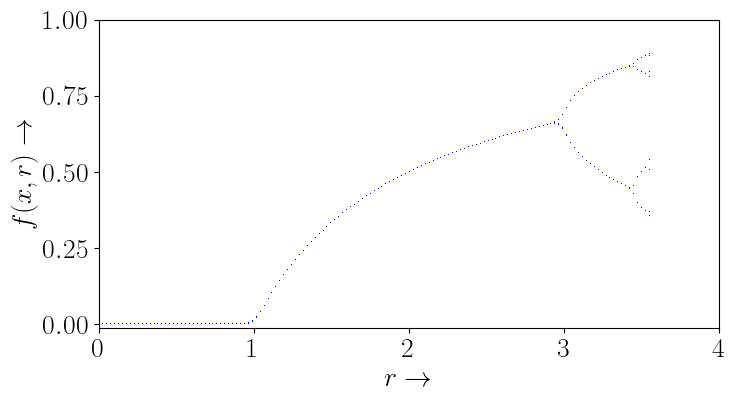

In [6]:
def logistic_map(x, const):
    r,_ = const
    return r * x * (1 - x)

R,X = bifurcation_diagram( logistic_map, seed=0.1, n_skip=50, n_iter=10, step=0.025, r_min=0, r_max=3.55, param=0)

plt.subplots(figsize=(8,4),sharex=True)
plt.plot(R, X, ',b',ms=0.75)
plt.ylim(-0.01, 1)
plt.xlim(0, 4)
plt.xlabel(r'$r \rightarrow $')
plt.ylabel(r'$f(x,r) \rightarrow $')
plt.show()

12.33                                                                                                                                              
Reproduce the logistic bifurcation diagram of Figure 12.41 for the range $2.8 < r < 4$. Take $x_0 = 0.1$.                                   
[Hint: To make Figure 12.41 I used about 50,000 points, but you certainly don't need to use that many.                               
In any case, start by using a very small number of points, perhaps just $r$ going from $2.8$ to $3.4$ in steps of $0.2$ and $t$ going from $51$ to $54$.                                                                                                     
This will let you calculate for each of the values of $r$ individually, and get the feel of how things work.                        
To make a good diagram, you will then need to increase the number of points ($r$ going from $2.8$ to $4$ in steps of $0.025$, and $t$ from $500$ to $600$, perhaps),                                                                               
and you will certainly need to automate the calculation of the large number of points.]

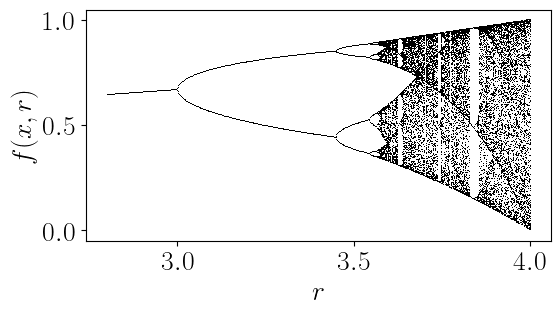

In [14]:
def logistic_map(x, const):
    r,_ = const
    return r * x * (1 - x)

R,X = bifurcation_diagram( logistic_map, seed=0.1, n_skip=600, n_iter=100, step=0.0025, r_min=2.8, r_max=4, param=0)

plt.figure(figsize=(6,3))
plt.plot(R, X, ',k', ms=0.25)
plt.xlabel(r'$r$')
plt.ylabel(r'$f(x,r)$')
plt.show()

12.34                                                                                                                                              
Make a bifurcation diagram for the sine map of Problems 12.23 and 12.25.                                                       
This should resemble Figure 12.41 but for the range $0.6 < r < 1$. Take $x_0 = 0.1$. Comment on its main features.                 
[Hint: Start by using a very small number of points, perhaps just $r$ going from $0.6$ to $0.8$ in steps of $0.05$ and $t$ going from $51$ to $54$.                                                                                                             
This will let you calculate for each of the values of $r$ individually, and get the feel of how things work.                      
To make a good diagram, you will then need to increase the number of points ($r$ going from $0.6$ to $1$ in steps of $0.005$, and $t$ from $400$ to $500$, perhaps),                                                                                    
and you will certainly need to automate the calculation of the large number of points.]

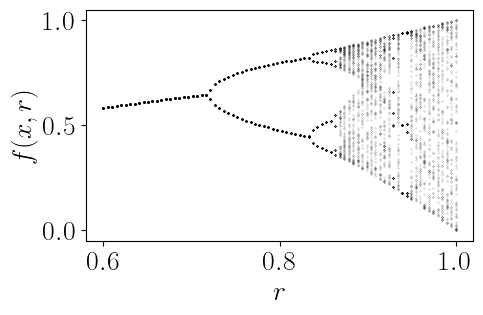

In [15]:
def sine_map(x, const):
    r,_ = const
    return r * np.sin(np.pi * x)

R,X = bifurcation_diagram( sine_map, seed=0.1, n_skip=500, n_iter=100, step=0.005, r_min=0.6, r_max=1, param=0)

plt.figure(figsize=(5,3))
plt.plot(R, X, '.k', ms=0.25, alpha=0.8)
plt.xlabel(r'$r$')
plt.ylabel(r'$f(x,r)$')
plt.show()

Make a bifurcation diagram for the Gaussian map :                                                                                                        
$ \qquad\qquad\displaystyle x_{n+1}=e^{-bx^2_n}+c$                                                       
For the range $ -1 < c < 1$. Take $x_0 = 0.0$ and $b=4.0,7.5$ . Comment on its main features.           

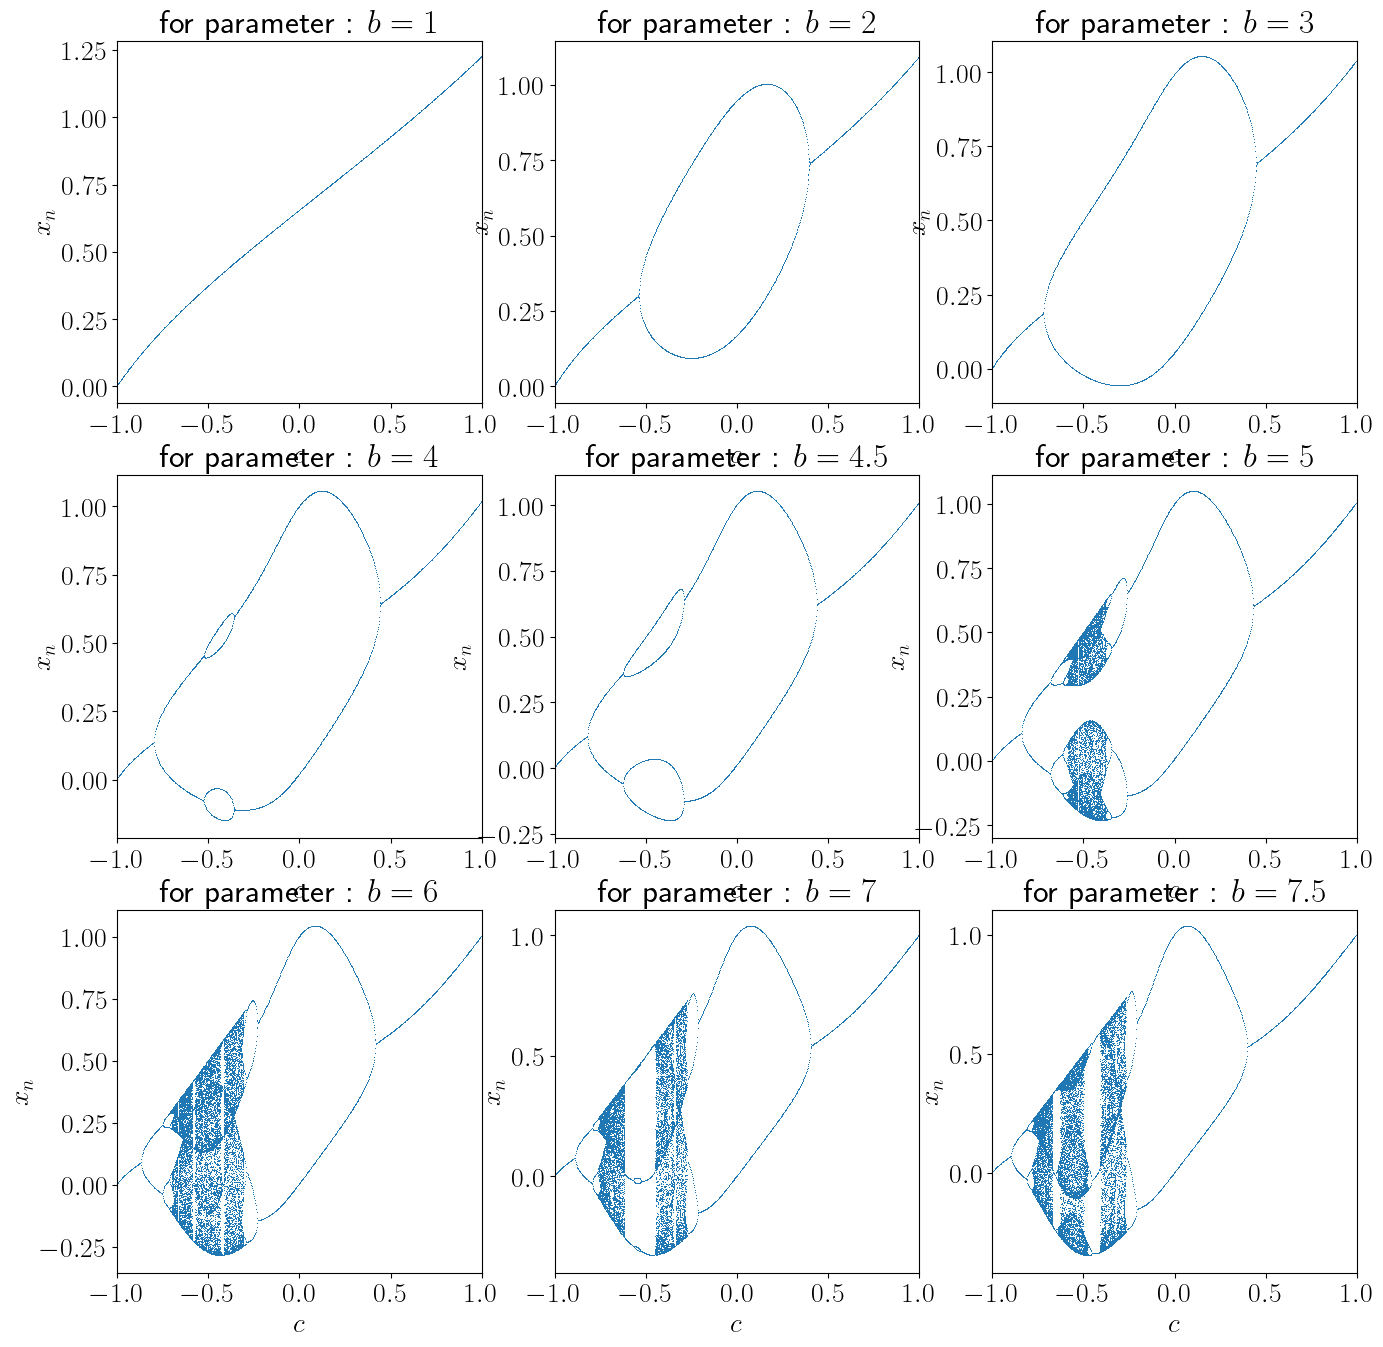

In [16]:
def gaussian_map(x, const):
    c, b = const
    return np.exp(-b * x**2) + c

b_values = [1,2,3,4,4.5,5,6,7,7.5]       

fig, ax = plt.subplots( 3,3, figsize=(16,16))
ax = ax.flatten()
for i, b in enumerate(b_values):
    R, X = bifurcation_diagram( gaussian_map, seed=0.0, n_skip=600, n_iter=100, step=0.0025, r_min=-1, r_max=1, param=b)
    ax[i].plot(R, X, ',', ms=0.1)
    ax[i].set_xlim(-1,1)
    ax[i].set_xlabel(r'$c$')
    ax[i].set_ylabel(r'$x_n$')
    ax[i].set_title(f'for parameter : $b={b}$')
plt.show()

Study of Lyapunov exponent 

In [7]:
def lyapunov_f(f, Jf, X0, const, iterations, transient):
    x_temp = X0
    lyapunov_sum = 0

    for _ in range(transient):
        x_temp = f(x_temp, const)

    for _ in range(iterations):
        x_temp = f(x_temp, const)
        J = Jf(x_temp, const)          # Jacobian is scalar for 1D maps
        lyapunov_sum += np.log(abs(J))
    return lyapunov_sum / iterations

In [95]:
# Define the Lyapunov exponent function
def lyapunov_f(f, Jf, X0, const, iterations, transient):
    x_temp = X0
    lyapunov_sum = 0

    for _ in range(transient):
        x_temp = f(x_temp, const)

    #v = np.array([1])
    v = np.ones_like(x_temp)
    
    for _ in range(iterations):
        x_temp = f(x_temp, const)
        J = Jf(x_temp, const)
        v = J @ v
        v_norm = np.linalg.norm(v)
        v = v / v_norm
        lyapunov_sum += np.log(v_norm)
        
    return lyapunov_sum / iterations

$ \qquad x_{n+1} = rx_n(1-x_n) $

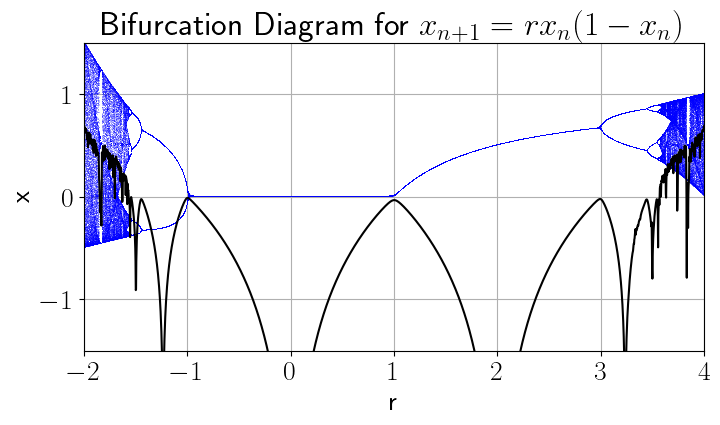

In [5]:
def logistic_map(x, const):
    r, _ = const
    return r * x * (1 - x)

def logistic_jacobian(x, const):
    r, _ = const
    return np.array([[r - 2 * r * x]])

X0 = np.array([0.1])
R, X = bifurcation_diagram(logistic_map, seed=0.1, n_skip=100, n_iter=200, step=2.5e-3, r_min=-2, r_max=4, param=0)
lyapunov_exponents = []
for r in R:
    const = (r, 0)
    lyapunov_exp = lyapunov_f(logistic_map, logistic_jacobian, X0, const, iterations=100, transient=10)
    lyapunov_exponents.append(lyapunov_exp)

lyapunov_exponents = np.array(lyapunov_exponents).flatten()
plt.figure(figsize=(8, 4))
plt.plot(R, X, ',b', alpha=0.25)  
plt.plot(R, lyapunov_exponents, '-k')
plt.title(r"Bifurcation Diagram for $x_{n+1} = rx_n(1-x_n)$")
plt.xlim(R.min(),R.max())
plt.ylim([-1.5,1.5])
plt.xlabel('r')
plt.ylabel('x')
plt.grid(True)
plt.show()

$ \qquad x_{n+1} = x_n e^{-r(1-x_n)} $

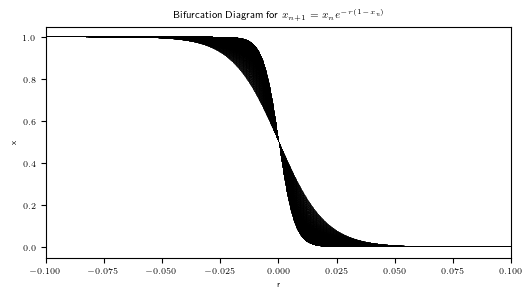

In [32]:
def logistic_map(x, const):
    r, param = const  # param is not used in this function, it's just part of the signature
    return x * np.exp(-r * (1 - x))

R, X = bifurcation_diagram(logistic_map, seed=0.5, n_skip=100, n_iter=200, step=1e-4, r_min=-0.1, r_max=0.1, param=0)

plt.figure(figsize=(6,3))
plt.plot(R, X, ',k', alpha=0.25)  # ',k' is a very small point in black
plt.title(r"Bifurcation Diagram for $x_{n+1} = x_n e^{-r(1-x_n)}$")
plt.xlim(R.min(),R.max())
plt.xlabel('r')
plt.ylabel('x')
plt.show()

$ \qquad x_{n+1} = e^{-rx_n}$

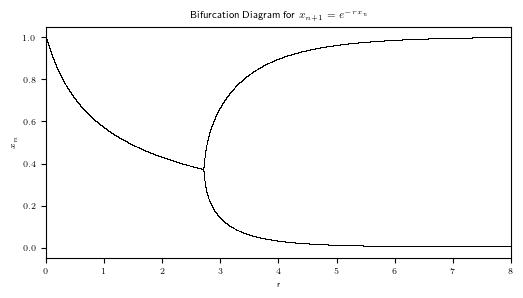

In [33]:
def map_function(x, const):
    r, _ = const
    return np.exp(-r * x)

R, X = bifurcation_diagram(map_function, seed=0.5, n_skip=1000, n_iter=100, step=0.001, r_min=0., r_max=8., param=0.)

plt.figure(figsize=(6,3))
plt.plot(R, X, ',k', alpha=0.25)
plt.title('Bifurcation Diagram for $x_{n+1} = e^{-r x_n} $')
plt.xlim(R.min(),R.max())
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.show()

$ \qquad x_{n+1} = r\cos x_n$

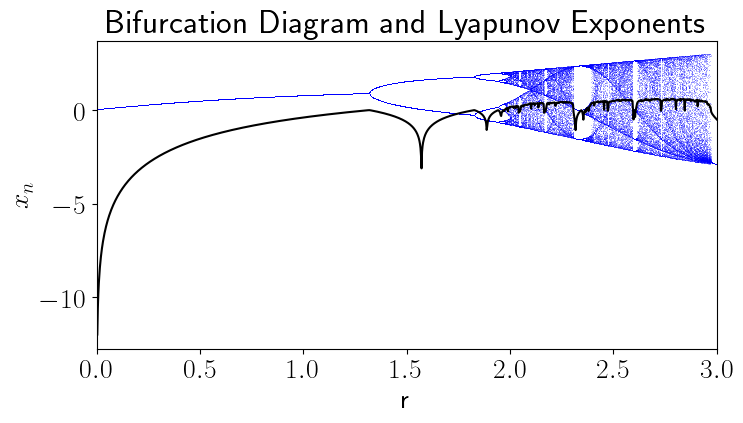

In [7]:
def map_function(x, const):
    r, _ = const
    return r * np.cos(x)

def map_jacobian(x, const):
    r, _ = const
    return np.array([[-r * np.sin(x)]])

R, X = bifurcation_diagram(map_function, seed=0.5, n_skip=1000, n_iter=100, step=2.5e-3, r_min=0., r_max=3., param=0.)
lyapunov_exponents = []
X0 = np.array([0.5])
for r in R:
    const = (r, 0)
    lyapunov_exp = lyapunov_f(map_function, map_jacobian, X0, const, iterations=1000, transient=100)
    lyapunov_exponents.append(lyapunov_exp)

lyapunov_exponents = np.array(lyapunov_exponents).flatten()

plt.figure(figsize=(8,4))
plt.plot(R, X, ',b', alpha=0.25)
plt.plot(R, lyapunov_exponents, '-k')
plt.title('Bifurcation Diagram and Lyapunov Exponents')
plt.xlim(R.min(),R.max())
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.show()

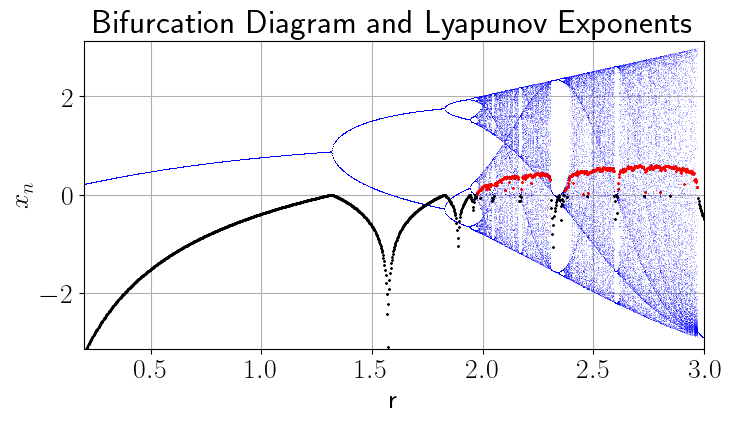

In [8]:
Lxb_vals = lyapunov_exponents

plt.figure(figsize=(8,4))
plt.plot(R, X, ',b', alpha=0.25)
#plt.plot(R, lyapunov_exponents, '-k')
plt.plot(R[Lxb_vals<0 ], Lxb_vals[Lxb_vals<0 ], 'k.',ms=0.12)
plt.plot(R[Lxb_vals>=0], Lxb_vals[Lxb_vals>=0], 'r.',ms=0.12)
plt.title('Bifurcation Diagram and Lyapunov Exponents')
plt.xlim(0.2,R.max())
plt.ylim([-np.pi,np.pi])
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.grid()
plt.show()

$\qquad x_{n+1}=r\tan x_n$

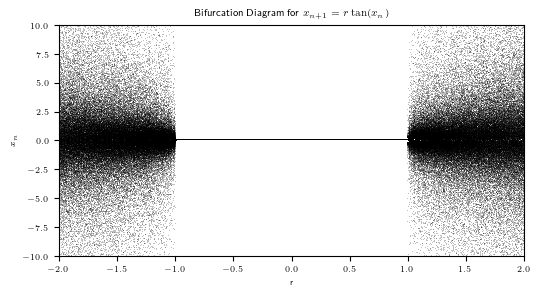

In [36]:
def map_function(x, const):
    r, _ = const
    return r * np.tan(x)

R, X = bifurcation_diagram(map_function, seed=0.1, n_skip=1000, n_iter=100, step=1e-3, r_min=-2, r_max=2, param=0.)

plt.figure(figsize=(6,3))
plt.plot(R, X, ',k', alpha=0.25)
plt.title('Bifurcation Diagram for $x_{n+1} = r \\tan(x_n)$')
plt.xlim(R.min(),R.max())
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.ylim(-10, 10)  # Limit y-axis to avoid extreme values
plt.show()

$\qquad x_{n+1}=rx_n-x_n^3$

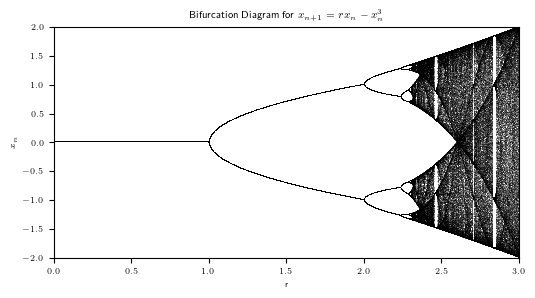

In [37]:
def map_function(x, const):
    r, _ = const
    return r*x - x**3
    
R, X = bifurcation_diagram(map_function, seed=0.1, n_skip=1000, n_iter=100, step=1e-3, r_min=-1, r_max=3, param=0.)

plt.figure(figsize=(6,3))
plt.plot(R, X, ',k', alpha=0.25)
plt.title('Bifurcation Diagram for $x_{n+1} = r x_n - x_n^3$')
plt.xlim(R.min(),R.max())

R, X = bifurcation_diagram(map_function, seed=-0.1, n_skip=1000, n_iter=100, step=1e-3, r_min=0, r_max=3, param=0.)

plt.plot(R, X, ',k', alpha=0.25)
plt.title('Bifurcation Diagram for $x_{n+1} = r x_n - x_n^3$')
plt.xlim(R.min(),R.max())
plt.xlabel('r')
plt.ylabel('$x_n$')
plt.ylim(-2, 2)  # Limit y-axis to focus on the main features
plt.show()

$\qquad x_{n+1}=C-x_n^2$

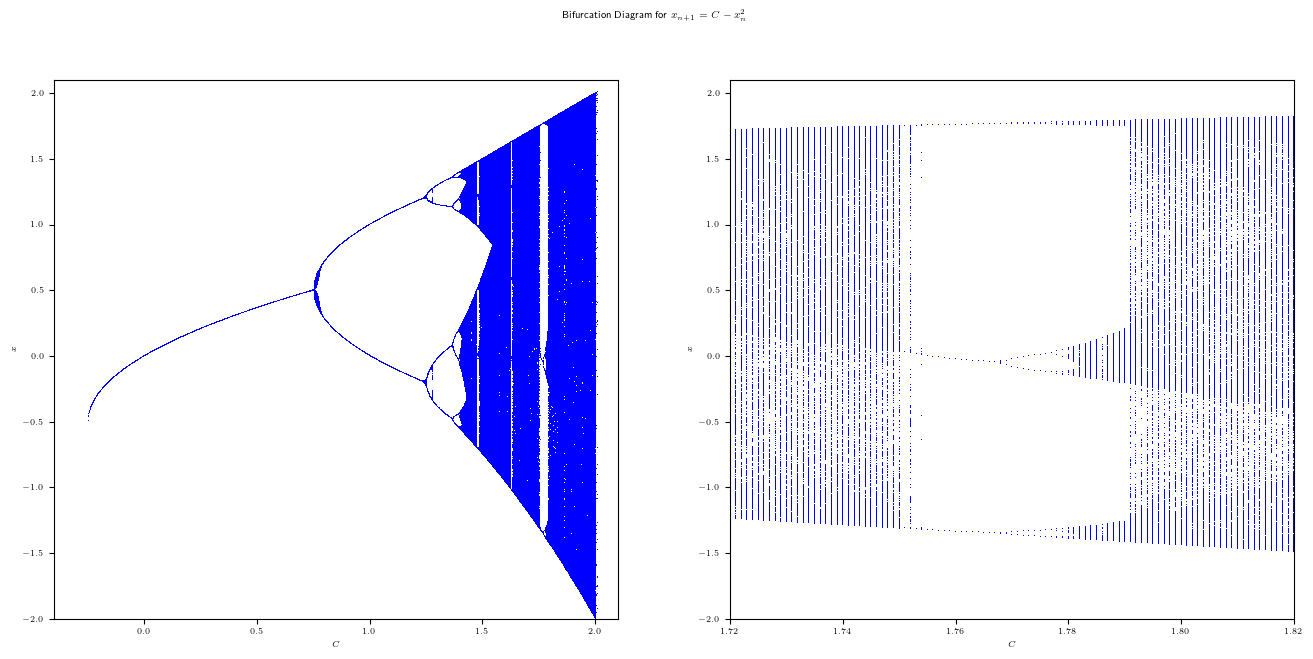

In [38]:
def quadratic_map(x, const):
    C, _ = const
    return C - x**2

# Parameters
seed = -0.5  # Initial value of x
n_skip = 100  # Number of iterations to skip (transients)
n_iter = 1000  # Number of iterations to plot after transients
step = 0.001  # Step size for C (the varying parameter)
r_min = -0.4  # Minimum C value
r_max = 2.1  # Maximum C value
param = 0  # This parameter is unused but necessary for function signature

# Generate bifurcation data
R, X = bifurcation_diagram(quadratic_map, seed, n_skip, n_iter, step, r_min, r_max, param)

# Plotting the bifurcation diagram
plt.figure(figsize=(16, 7))
plt.suptitle("Bifurcation Diagram for $x_{n+1} = C - x_n^2$")

plt.subplot(121)
plt.plot(R, X, 'b,', ms=0.012)
plt.xlabel("$C$")
plt.ylabel("$x$")
plt.xlim([r_min, r_max])
plt.ylim([-2,2.1])

plt.subplot(122)
plt.plot(R, X, 'b,', ms=0.012)
plt.xlabel("$C$")
plt.ylabel("$x$")
plt.xlim([1.72, 1.82])
plt.ylim([-2,2.1])
plt.show()

10.1 Fixed Points and Cobwebs

$x_{n+1} = \sqrt{x_n}$

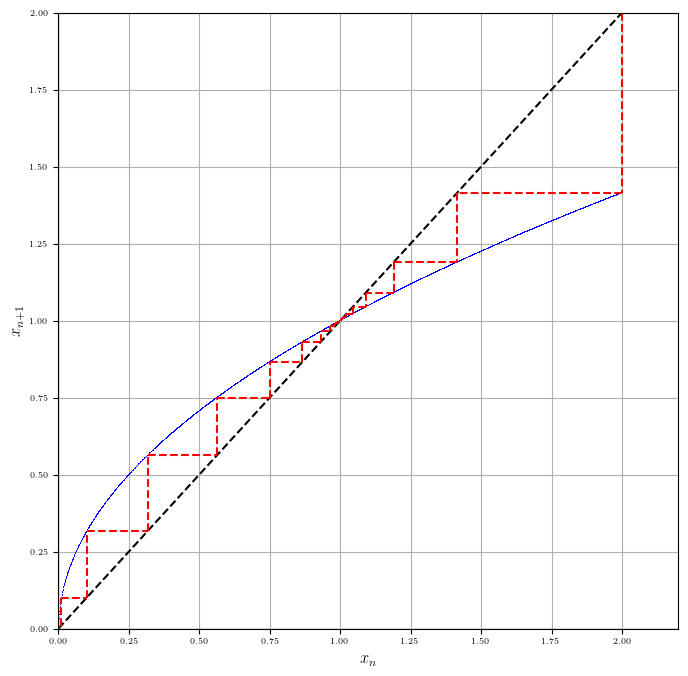

In [45]:
def f(x):
    return x**0.5

x_values = np.linspace(0,2,2000)
x_next_values = f(x_values)
x0 = [0.01, 1, 2.]  # Multiple initial conditions
n_iter = 10

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([0,2.2])
plt.ylim([0,2])
plt.show()

$x_{n+1}=x^3_n$

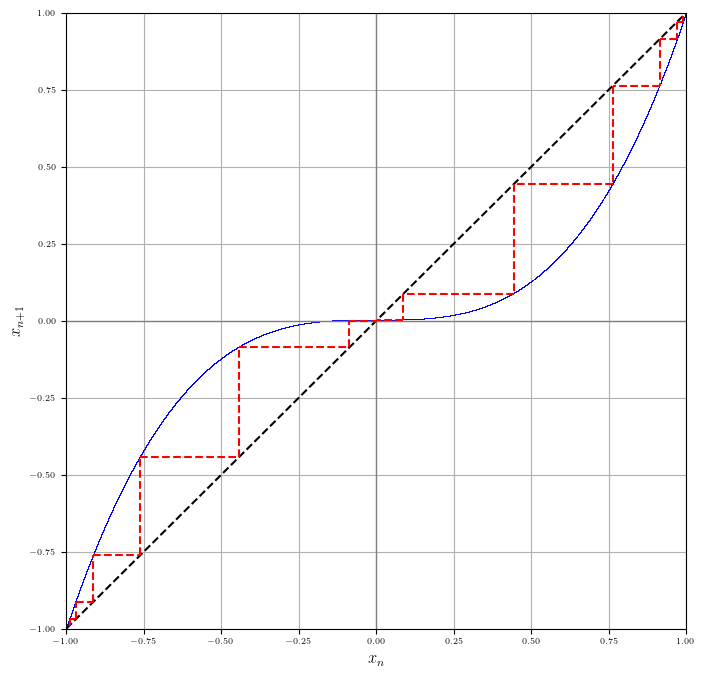

In [50]:
def f(x):
    return x**3

x_values = np.linspace(-2,2,200000)
x_next_values = f(x_values)
x0 = [-0.99,0.99]  # Multiple initial conditions
n_iter = 40

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

$x_{n+1}=\exp x_n$

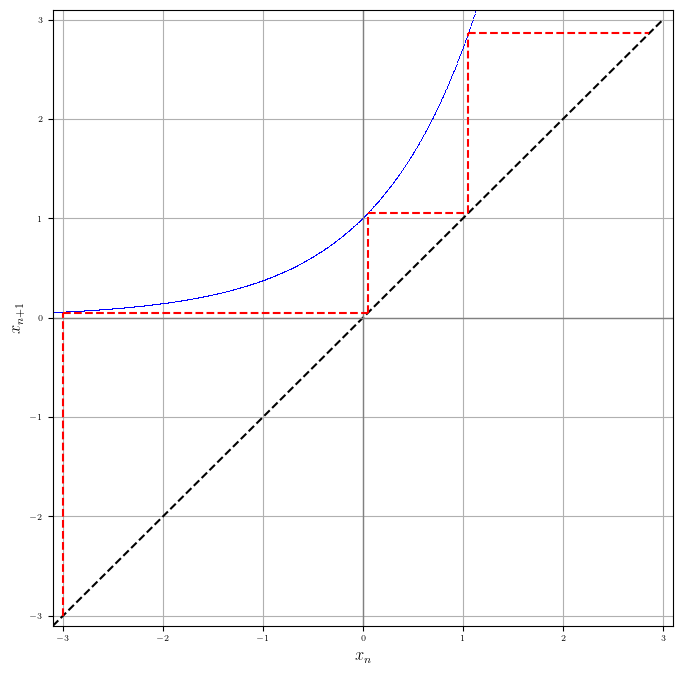

In [21]:
def f(x):
    return np.exp(x)

x_values = np.linspace(-5,3,2000)
x_next_values = f(x_values)
x0 = [-3.]  # Multiple initial conditions
n_iter = 3

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-3.1,3.1])
plt.ylim([-3.1,3.1])
plt.show()

$x_{n+1}=\ln x_n$

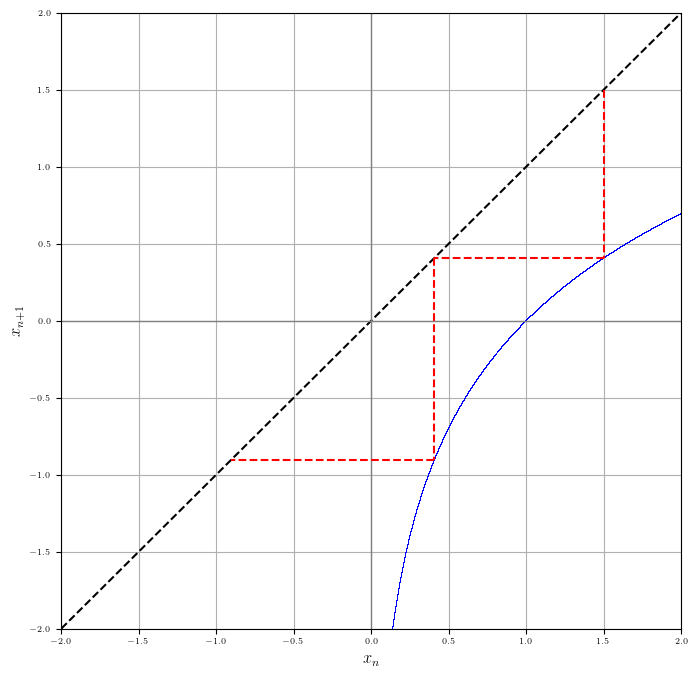

In [52]:
def f(x):
    return np.log(x)

x_values = np.linspace(-2,2,200000)
x_next_values = f(x_values)
x0 = [-1, 1.5]  # Multiple initial conditions
n_iter = 10

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

$x_{n+1}=\cot x_n$

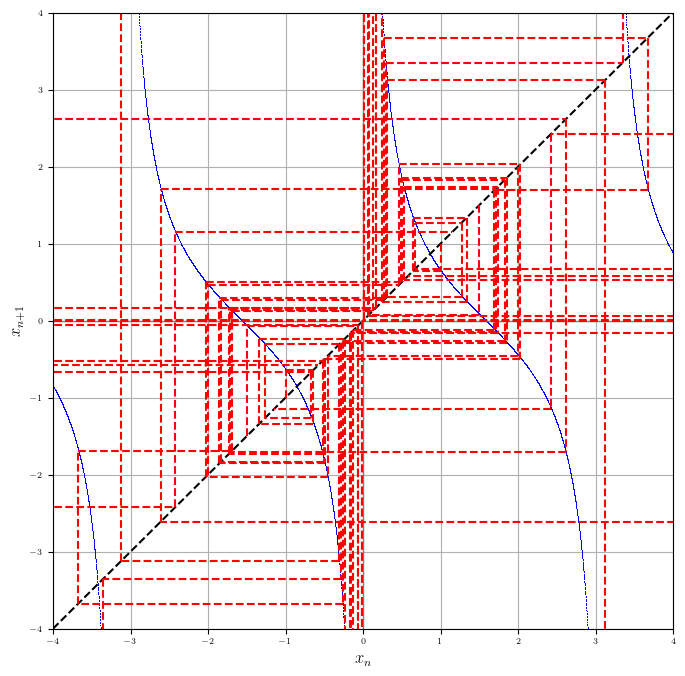

In [23]:
def f(x):
    return 1/np.tan(x)

x_values = np.linspace(-5,5,8000)
x_next_values = f(x_values)
x0 = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]  # Multiple initial conditions
n_iter = 11

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

$x_{n+1}=\tan x_n$

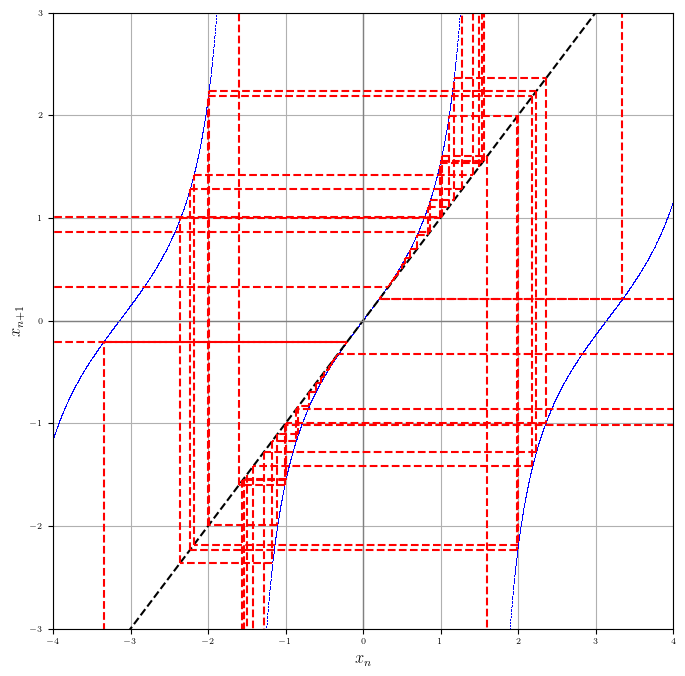

In [46]:
def f(x):
    return np.tan(x)

x_values = np.linspace(-6,6,8000)
x_next_values = f(x_values)
x0 = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]  # Multiple initial conditions
n_iter = 11

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-4,4])
plt.ylim([-3,3])
plt.show()

$x_{n+1}=\sinh x_n$ 

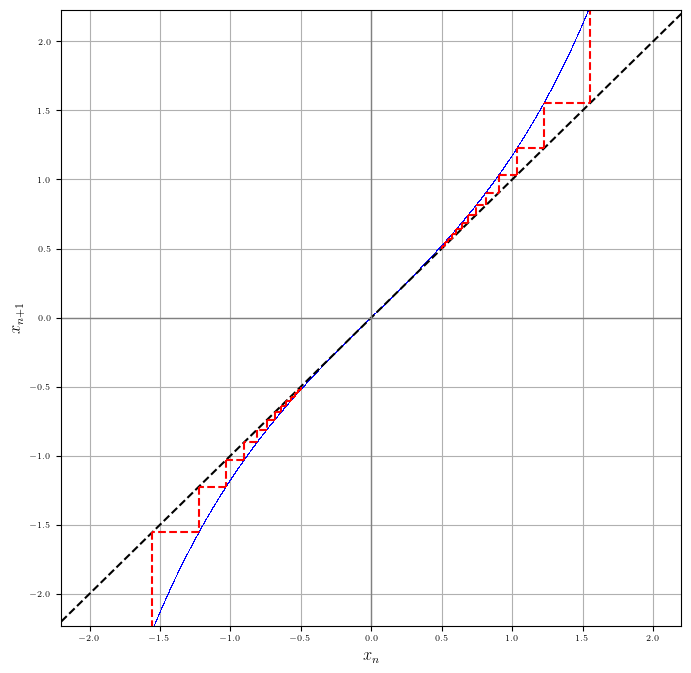

In [25]:
def f(x):
    return np.sinh(x)

x_values = np.linspace(-np.pi,np.pi,8000)
x_next_values = f(x_values)
x0 = [ -0.5, 0.5]  # Multiple initial conditions
n_iter = 14

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-2.2,2.2])
plt.ylim([-2.23,2.23])
plt.show()

$x_{n+1} =\tanh x_n$

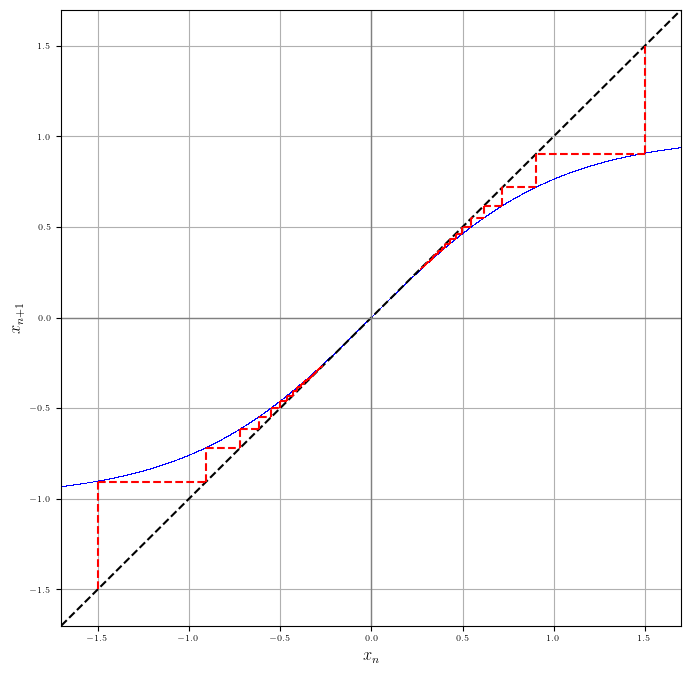

In [26]:
def f(x):
    return np.tanh(x)

x_values = np.linspace(-np.pi,np.pi,8000)
x_next_values = f(x_values)
x0 = [ -1.5, 1.5]  # Multiple initial conditions
n_iter = 20

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-1.7,1.7])
plt.ylim([-1.7,1.7])
plt.show()

10.1.10                                                                                                                     
Analyze the map $\displaystyle x_{n+1}=\frac{2x_n}{1+x_n}$ for both positive and negative $x_n$.

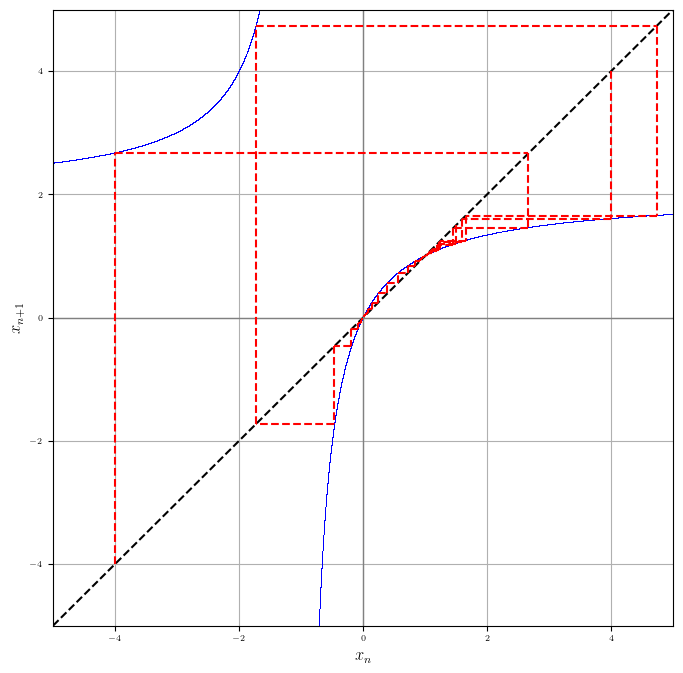

In [27]:
def f(x):
    return 2 * x / (1 + x)

x_values = np.linspace(-5, 5, 50000)
x_next_values = f(x_values)
x0 = [-4., -0.01, 0.01, 1.5, 4.]  # Multiple initial conditions
n_iter = 400

plt.figure(figsize=(8,8))
plt.plot(x_values, x_next_values, 'b,')
plt.plot(x_values, x_values, 'k--')
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

for initial_value in x0:
    current_theta = initial_value
    for _ in range(n_iter):
        next_theta = f(current_theta)
        plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r--', ms=0.1)  # Vertical line
        plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r--', ms=0.1)  # Horizontal line
        current_theta = next_theta

plt.xlabel(r"$x_n$", fontsize=12)
plt.ylabel(r"$x_{n+1}$", fontsize=12)
plt.grid(True)
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

Analyze the map $\displaystyle \theta_{n+1}=\theta_n + \Omega - \frac{K}{2\pi}\sin\left(2\pi\theta_n\right)$ for positive  $\theta_n$.

In [20]:
def sine_circle_map(theta, const):
    K, Omega = const
    return (theta + Omega - (K / (2 * np.pi)) * np.sin(2 * np.pi * theta)) % 1

def sine_circle_map_jacobian(theta, const):
    K, Omega = const
    return 1 - (K * np.cos(2 * np.pi * theta))

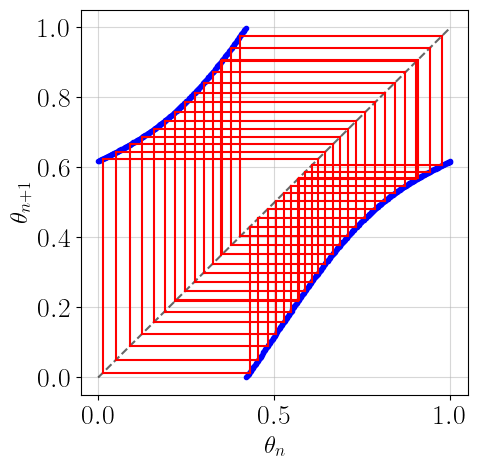

In [21]:
n_iter = 40            # Number of iterations
K      = 0.5
Omega  = 0.6180339
theta0 = 0.35
const  = (K, Omega)
x      = np.linspace(0, 1, 500)
y      = sine_circle_map(x, const)
theta_values = [theta0] 
for _ in range(n_iter):
    theta_values.append(sine_circle_map(theta_values[-1], const))

plt.figure(figsize=(5,5))
plt.plot(x, x, 'k--', alpha=0.6)
plt.plot(x, y, 'b.')

current_theta = theta0
for _ in range(n_iter):
    next_theta = sine_circle_map(current_theta, const)
    plt.plot([current_theta, current_theta], [current_theta, next_theta], 'r-', ms=0.1)  # Vertical line
    plt.plot([current_theta, next_theta], [next_theta, next_theta], 'r-', ms=0.1)  # Horizontal line
    current_theta = next_theta
    
plt.xlabel(r"$\theta_n$", fontsize=18)
plt.ylabel(r"$\theta_{n+1}$", fontsize=18)
plt.grid(alpha=0.5)
plt.show()

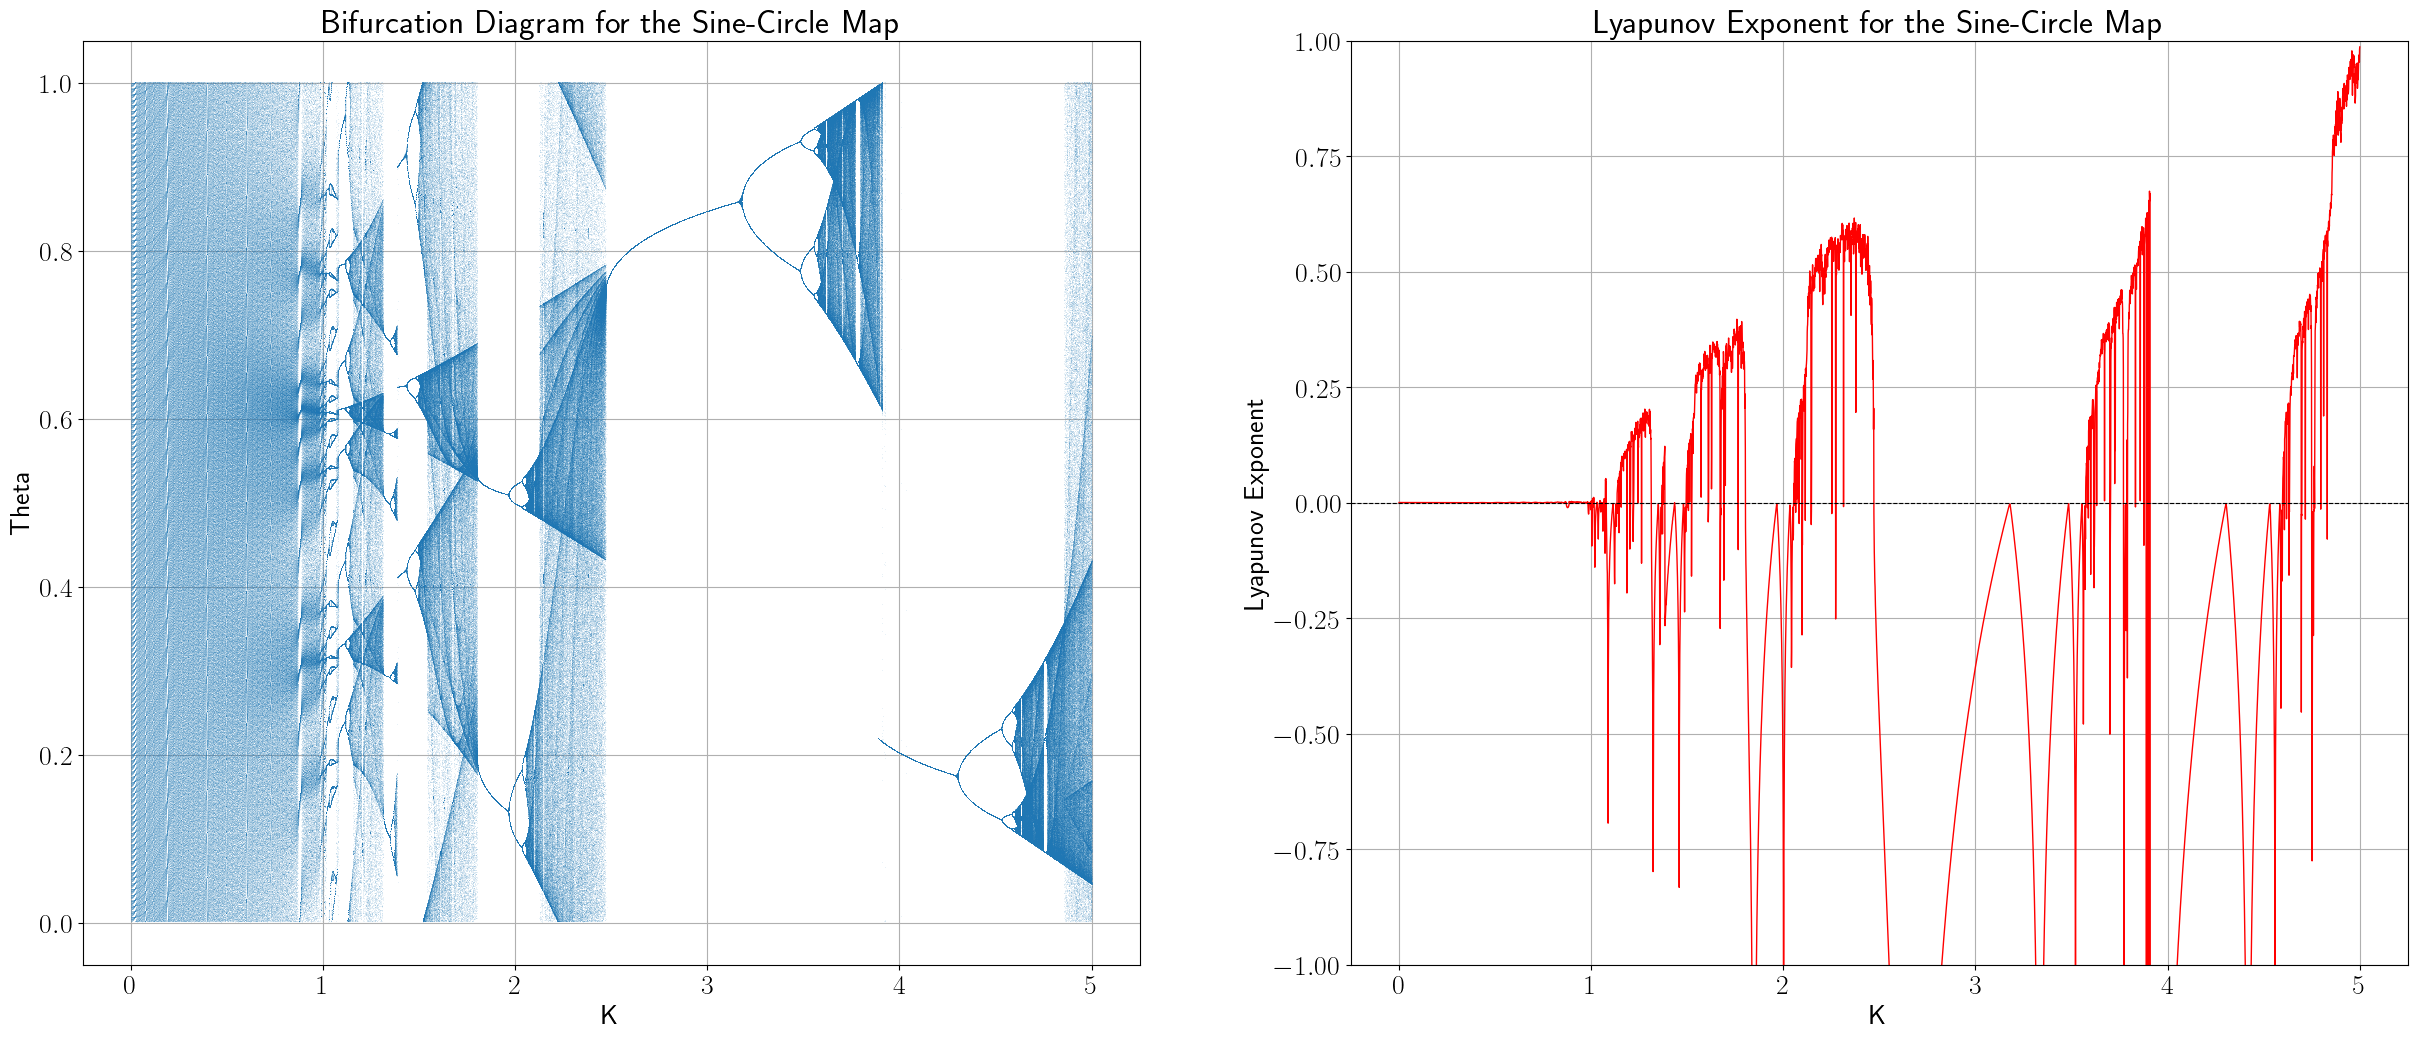

In [22]:
Omega    = 0.606661
seed     = 0.5          # Initial value for theta
n_skip   = 100          # Skip these iterations to eliminate transient behavior
n_iter   = 1000         # Number of points to plot for bifurcation
step     = 0.001        # Step size for K
r_min    = 0.0          # Minimum K
r_max    = 5.0          # Maximum K
k_values = np.linspace(r_min, r_max, int((r_max - r_min) / step))

R, X = bifurcation_diagram(sine_circle_map, seed, n_skip, n_iter, step, r_min, r_max, Omega)

lyapunov_exponents = []
for k in k_values:
    const = (k, Omega)
    lyapunov_exponent = lyapunov_f(sine_circle_map, sine_circle_map_jacobian, seed, const, n_iter, n_skip)
    lyapunov_exponents.append(lyapunov_exponent)

fig, ax = plt.subplots(1,2, figsize=(30, 12))
ax = ax.flatten()
ax[0].plot(R, X, ',', alpha=0.1)
ax[0].set_title("Bifurcation Diagram for the Sine-Circle Map")
ax[0].set_xlabel("K")
ax[0].set_ylabel("Theta")
ax[0].grid(True)
ax[1].plot(k_values, lyapunov_exponents, color='red', linewidth=1)
ax[1].set_title("Lyapunov Exponent for the Sine-Circle Map")
ax[1].set_xlabel("K")
ax[1].set_ylim([-1.,1])
ax[1].set_ylabel("Lyapunov Exponent")
ax[1].axhline(0, color='black', linestyle='--', linewidth=0.8)
ax[1].grid(True)
plt.show()

Sine-circle Map : 

$\qquad\theta_{n+1}=\theta_n + \Omega - \frac{K}{2\pi}\sin(2\pi\theta_n) \ \text{mod} \ [1] \quad \text{where} \ 0.5<K<5.5, \ \Omega=0.5 $

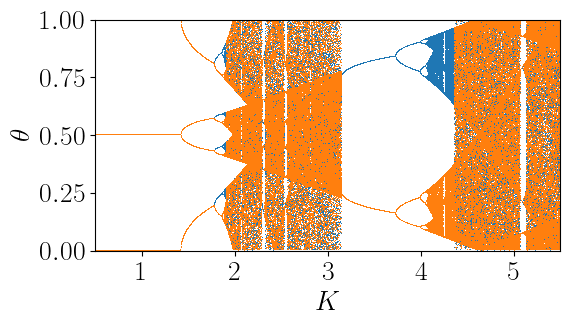

In [28]:
plt.figure(figsize=(6,3))

for x0 in [-np.pi, np.pi]:
    R, X = bifurcation_diagram(sine_circle_map,seed=x0,n_skip=500,n_iter=100,step=0.002,r_min=0.5,r_max=5.5,param=0.5)
    plt.plot(R, X, ',', ms=0.5)
plt.xlabel(r'$K$')
plt.ylabel(r'$\theta$')
plt.ylim(0,1)
plt.xlim(R.min(),R.max())
plt.show()

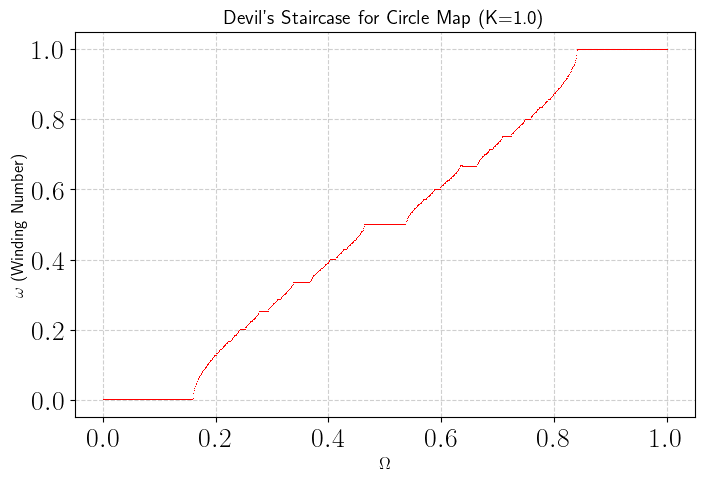

In [31]:
def circle_map(theta, const):
    Omega, K = const
    return theta + Omega - (K / (2 * np.pi)) * np.sin(2 * np.pi * theta)

def compute_winding_number(Omega, K, n_iter=1000, discard=500):
    theta = 0.0                                                                 # Initial condition
    thetas = []
    for _ in range(n_iter):
        theta = circle_map(theta, (Omega, K))
        thetas.append(theta)
    theta_array = np.array(thetas[discard:])                                    # Discard the transient iterations
    winding_number = (theta_array[-1] - theta_array[0]) / (len(theta_array))    # Compute the winding number
    return winding_number

K         = 1.0                                                                 # Coupling constant
Omega_min = 0.0
Omega_max = 1.0
n_points  = 1000
Omega_values    = np.linspace(Omega_min, Omega_max, n_points)
winding_numbers = [compute_winding_number(Omega, K) for Omega in Omega_values]
    
plt.figure(figsize=(8,5))
plt.plot(Omega_values, winding_numbers,'r,', ms=1.5)
plt.title(f"Devil's Staircase for Circle Map (K={K})", fontsize=14)
plt.xlabel("$\Omega$", fontsize=12)
plt.ylabel("$\omega$ (Winding Number)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

11.2.6 $\qquad\qquad$       (Devil’s staircase)                                                                                                        
Suppose that we pick a point at random from the Cantor set.                                                                
What’s the probability that this point lies to the left of $x$, where $0 \le x \le 1$ is some fixed number?               
The answer is given by a function $P ( x )$ called the devil’s staircase.                                                  
a) It is easiest to visualize $P ( x )$ by building it up in stages. First consider the set $S_0$.                       
Let $P_0(x)$ denote the probability that a randomly chosen point in $S_0$ lies to the left of $x$. Show that $P_0(x)=x$.    
b) Now consider $S_1$ and define $P_1(x)$ analogously. Draw the graph of $P_1(x)$. (Hint : It should have a plateau in the middle.)                                                                                                                            
c) Draw the graphs of $P_n(x)$, for $n=2,3,4$. Be careful about the widths and heights of the plateaus.                           
d) The limiting function $P_\infty ( x )$ is the devil’s staircase. Is it continuous? What would a graph of its derivative look like?                                                                                                                         
Like other fractal concepts, the devil’s staircase was long regarded as a mathematical curiosity.                        
But recently it has arisen in physics, in connection with mode-locking of nonlinear oscillators.                            
See Bak (1986) for an entertaining introduction.

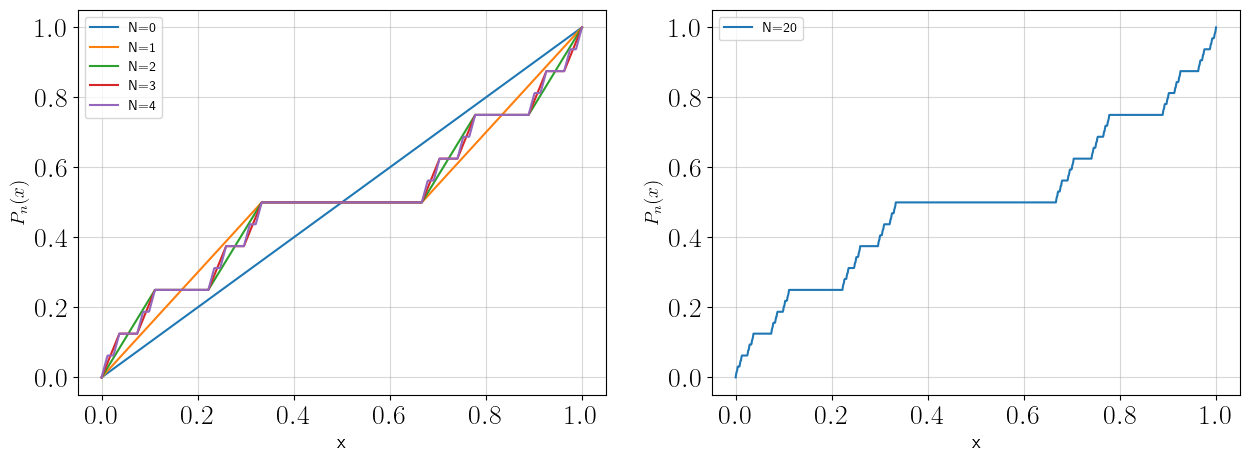

In [27]:
def devil_staircase(x, n):
    if n == 0:
        return x                                             # Initial probability distribution for S_0
    elif x < 1/3:
        return 0.5 * devil_staircase(3 * x, n - 1)           # First segment [0, 1/3]
    elif x > 2/3:
        return 0.5 * (1 + devil_staircase(3 * x - 2, n - 1)) # Last segment [2/3, 1]
    else:
        return 0.5                                           # Plateau region for removed middle third [1/3, 2/3]

x_vals = np.linspace(0, 1, 1000)
N = [ 0, 1, 2, 3, 4, 20]

fig, ax=plt.subplots(1,2,figsize=(15,5))
ax=ax.flatten()
for i in range(len(N[:-1])): 
    y_vals = [devil_staircase(x, N[i]) for x in x_vals]
    ax[0].plot(x_vals, y_vals, lw=1.5, label=f'N={N[i]}')
#ax[0].set_title(f'$N={N[i]}$', fontsize=10)
ax[0].set_xlabel("x", fontsize=14)
ax[0].set_ylabel("$P_n(x)$", fontsize=14)
ax[0].grid(alpha=0.5)
ax[0].legend(fontsize=10)
    
y_vals = [devil_staircase(x, N[-1]) for x in x_vals]
ax[1].plot(x_vals, y_vals, lw=1.5, label=f'N={N[-1]}')
#ax[1].set_title(f'$N={N[-1]}$', fontsize=10)
ax[1].set_xlabel("x", fontsize=14)
ax[1].set_ylabel("$P_n(x)$", fontsize=14)
ax[1].grid(alpha=0.5)
ax[1].legend(fontsize=10)   
plt.show()